[栈和队列](data_structure/stack_queue.md)  

栈的特点是后入先出  
根据这个特点可以临时保存一些数据，之后用到依次再弹出来，常用于 DFS 深度搜索  
队列一般常用于 BFS 广度搜索，类似一层一层的搜索  

In [ ]:
class MinStack:
    def __init__(self):
        self.s1 = []

    def push(self,x):
        if len(self.s1 != 0):
            self.s1.append((x,min(x,self.s1[-1][1])))
        else:
            self.s1.append((x,x))
            
    def pop(self):
        return self.s1.pop()[0]
    def top(self):
        return self.s1[-1][0]
    def getMin(self):
        return 

In [48]:
nums = [1,3,-1,-3,5,3,6,7]
k = 3
for i in range(k,len(nums),1):
    print(i,i+k)
    # print(max(nums[i:i+k]))
# max 

3 6
4 7
5 8
6 9
7 10


In [22]:
stack= [(nums[0],nums[0])]
stack

[(1, 1)]

In [26]:
stack= [(nums[0],nums[0])]

for num in enumerate(nums[1:k]):
    stack.append((num,max(num,stack[-1][1])))
print(stack)

assert len(stack) == k,"栈初始化错误"

TypeError: '>' not supported between instances of 'int' and 'tuple'

In [100]:
import collections

# 比新元素小的值都弹出，头部永远是最大值，从后面出来
# 头部元素弹出
nums = [1,3,1,2,0,5]
k = 3
deque  = collections.deque()
# deque[0]
res = []
for i,num in enumerate(nums):
    
    while len(deque)>0 and nums[deque[-1]]< num:
        deque.pop()
    deque.append(i)

    # 2. 移除窗口外的元素
    if deque[0] <= i - k:
        deque.popleft()
    
    if i>=k-1:
        res.append(nums[deque[0]])
    
    
        
deque,len(deque),res

(deque([5]), 1, [3, 3, 2, 5])

### 除法的向零截断
- 6 / -132, 6 // -132
- Python 的 // 是向下取整，不是向零截断。
- 

In [103]:
6 / -132, 6 // -132, int(6 / -132)

(-0.045454545454545456, -1, 0)

In [ ]:
def evalRPN(tokens):
    # 计算函数
    def compute(x,y,operator):
        if operator == '+':
            return x+y
        if operator == '-':
            return x-y
        if operator == '*':
            return x*y
        if operator == '/':
            return int(x/y)

    
    # 栈！
    stack = []
    for num in nums:
        if num in ['+','-','*','/',]:
            y = stack.pop()
            x = stack.pop()
            stack.append(compute(x,y,num))
        else:
            stack.append(int(num))
            
    return stack[-1]     

In [119]:
def getNum(c):
    return True if c <= '9' and c >= '0' else False
x = '2'
x*10


'2222222222'

In [ ]:


def decodeString(s: str) -> str:
    stack_str= ['']
    stack_num =[]
    num = 0
    for ch in s:
        if ch <= '9' and ch >= '0' :
            num = int(ch)
        elif ch == '[':
            stack_num.append(num)
            stack_str.append('')
            num = 0
        elif ch == ']':
            curr_str = stack_str.pop()
            stack_str[-1] += curr_str * stack_num.pop()
        else:
            stack_str[-1] += ch
            
            
    return stack_str[0]
# s = "3[a]2[bc]"
s = "3[a2[c]]"
decodeString(s)


'accaccacc'

In [135]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [ ]:
def inorderTraversal(root):
    stack, inorder = [], []
    node = root
    while len(stack)>0 or node is not None:
        if node is not None:
            stack.append(node)
            node = node.left
        else:
            node = stack.pop()
            inorder.append(node.val)
            node = node.right
    return inorder
            

In [149]:
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []
start = Node(1,[2,4])
stack = [start]
visited = {start:Node(start.val,[])}
peek = stack[-1]
visited[peek].val

1

In [ ]:


# 思路：遍历所有节点，压入栈，因为图太复杂，所以要定义一个已经访问的节点,字典{旧节点：克隆后的节点，还没有克隆边关系}
def cloneGraph(start):
    stack = [start]
    visited = {start:Node(start.val,[])}
    while len(stack) > 0:
        peek = stack[-1] # 偷窥指针帮我
        peek_clone = visited[peek]
        if len(peek_clone.neighbors) == 0:
            # 没有邻居要加邻居
            for n in peek.neighbors:
                if n not in visited: # 这里n 代表图的顶点 
                    visited[n] = Node(n.val, [])
                    stack.append(n)
                peek_clone.neighbors.append(visited(n))   
        else:
            start.pop() 
    
    return visited[start]

    
    
    
    

SyntaxError: invalid syntax (3711851014.py, line 12)

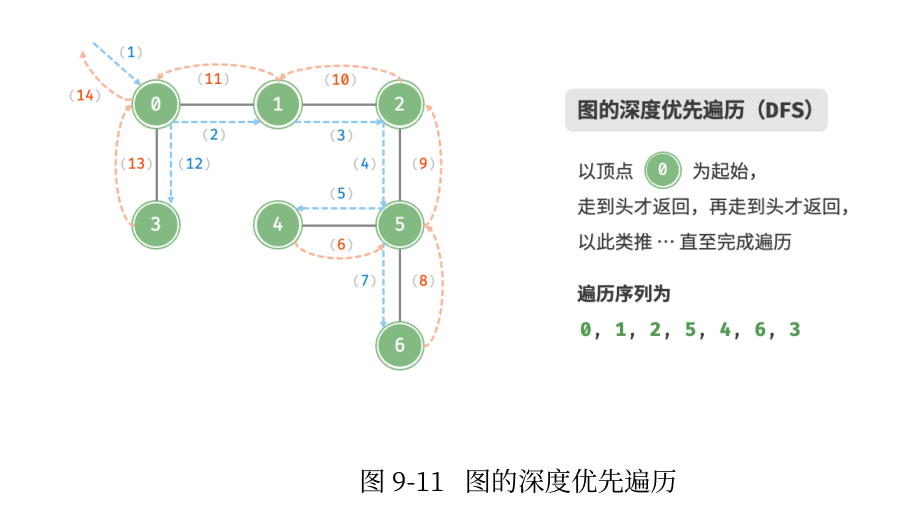

### 图的遍历还有一种广度优先搜索，这里没用到，以后再学

i 是列， j 是行  
 - i - 1 上
 - j - 1 左
 - 上左下右，出栈顺序就是右下左上

In [2]:
grid = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]

len(grid)

4

In [4]:
def numIslands(grid):
    
    m,n = len(grid), len(grid[0])
    
    def dfs_iter(i,j):
        stack = [(i,j)]
        while len(stack) > 0:
            i,j = stack.pop()
            if grid[i][j] == '1':
                grid[i][j] = '0'
                # 下面是路径逻辑，这是图遍历的核心，可以提供前进和后退
                if i -1 >= 0:
                    stack.append((i-1,j))
                if j -1 >= 0:
                    stack.append((i,j-1))
                if i +1 <= m:
                    stack.append((i+1,j))
                if j +1 <= n:
                    stack.append((i,j+1))
                
    num_island = 0
    for i in range(m):
        for j in range(n):
            if grid[i][j] == '1':
                num_island += 1
                dfs_iter(i,j)
    return num_island

In [6]:
for i in range(0):
    print(i)
    
min(2,2)

2

这里的 AC 是算法竞赛里的术语，全称是 Accepted，意思是“通过了评测”。

在中文语境里，大家一般直接说：

AC = 答案正确 / 通过

无法 AC = 不能通过评测（不能拿满分） 

### 最大的矩形区域
包含当前 bar 最大矩形的边界为左边第一个高度小于当前高度的 bar 和右边第一个高度小于当前高度的 bar。  
栈的作用是存储L[i]和遇到R[i]的时候出栈，这个本质是一个单调递增栈  
最坏的情况，时间复杂度是2n

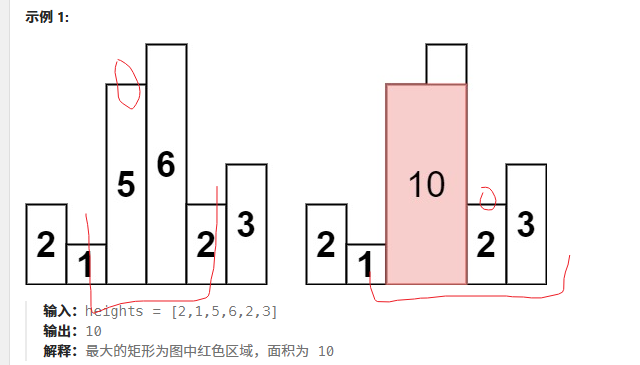


In [ ]:
def largestRectangleArea(heights):
    n = len(heights)
    stack = [-1]
    max_area = 0
    for i in range(n):
        while len(stack) > 1 and heights[i] < heights[stack[-1]]:
            h = stack.pop()
            max_area = max(max_area, heights[h] *(i- stack[-1] -1 ) )
        stack.append(i)
        
    while len(stack) > 1:
        h = stack.pop()
        max_area = max(max_area, heights[h] *(n- stack[-1] -1))
        
    return max_area

In [ ]:
# 思路，两个栈来回倒腾，一个是cache栈，一个是输出栈
# 倒腾的次数不多
class MyQueue:

    def __init__(self):
        self.out = []
        self.cache = []

    def push(self, x: int) -> None:
        self.cache.append(x)

    def pop(self) -> int:
        if len(self.out) == 0:
            while len(self.cache) > 0:
                self.out.append(self.cache.pop())
        return self.out.pop() 

    def peek(self) -> int:
        return self.cache[0] if len(self.out) == 0 else self.out[-1] 
    def empty(self) -> bool:
        return len(self.cache) == 0 and len(self.out) == 0

In [10]:
s = [1,2]
s.pop()

2

In [11]:
s.pop()

1

In [12]:
s.pop()

IndexError: pop from empty list

In [13]:
import collections


bfs = collections.deque([None]) 

len(bfs)

1

In [ ]:
res = [[0]*n for _ in range(m)]
res

# deque = collections.deque([(1,2)])
# # a,b = deque.popleft()
# deque.append((2,2))
# len(deque),deque

(2, deque([(1, 2), (2, 2)]))

In [41]:
def bfs_iter(i,j):
    deque = collections.deque([(i,j)])
    i ,j = deque.popleft()
    print(i,j)
    
bfs_iter(1,1)

1 1


In [ ]:
# 思路，按照上左下右的顺序压入队列，实现广度优先搜索，遇到0则退出
# 优化：其实之前的最近距离已经求出来了，能不能利用上呢
# 就是把最近距离存下来

class Solution:
    def updateMatrix(mat):
        m,n = len(mat), len(mat[0])
    
        def bfs_iter(i,j):
            deque = collections.deque([(i,j)])
            dis = 1
            while len(deque) >0:
                i ,j = deque.popleft()
                print(i,j)
                if i -1 >=0:
                    if mat[i-1][j] == 1:
                        deque.append((i-1,j))
                    else:
                        return dis
                if j -1 >=0:
                    if mat[i][j-1] == 1:
                        deque.append((i,j-1))
                    else:
                        return dis
                if i+1 < m:
                    if mat[i+1][j] == 1:
                        deque.append((i+1,j))
                    else:
                        return dis
                        
                if j+1 < n:
                    if mat[i][j+1] == 1:
                        deque.append((i,j+1))
                    else:
                        return dis
                
                # 判断和入队列分开
                dis += 1
        res = [[0]*n for _ in range(m)]
        print(res)
        for i in range(m):
            for j in range(n):
                if mat[i][j] == 1 :
                    res[i][j] = bfs_iter(i,j)
        return res
    


### 我的代码错误点
- res = [[0]*n]*m  这行代码并不是创建了 m 个互相独立的行，而是创建了一行，然后复制了多次，所有行引用的是同一个对象。
- BFS 的 dis 逻辑不对，用 deque 存 (i,j,dis) 三元组；
- 没有 visited，导致死循环，大矩阵超时，这是最致命的问题，模版解法是多源 BFS：